### 1) Extract reviews of any product from ecommerce website like amazon
### 2) Perform emotion mining

### Importing required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
import requests

In [11]:
wm_title=[]  
wm_date = []
wm_content = []
wm_rating = []
for i in range(1,150):
    link ="https://www.amazon.in/New-Apple-iPhone-Pro-512GB/product-reviews/B08L5WVZJ7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
response = requests.get(link)
soup = bs(response.content,"html.parser")

### Extracting Review Title

In [12]:
title = soup.find_all('a',class_='review-title-content')
review_title = []
for i in range(0,len(title)):
    review_title.append(title[i].get_text())
review_title[:] = [titles.lstrip('\n') for titles in review_title]
review_title[:] = [titles.rstrip('\n') for titles in review_title]
wm_title = wm_title + review_title

### Extracting Ratings

In [15]:
rating = soup.find_all('i',class_='review-rating')
review_rating = []
for i in range(2,len(rating)):
    review_rating.append(rating[i].get_text())
#review_rating.pop(0)
#review_rating.pop(0)
review_rating[:] = [reviews.rstrip(' out of 5 stars') for reviews in review_rating]
wm_rating = wm_rating + review_rating 

### Extracting Content of review

In [16]:
review = soup.find_all("span",{"data-hook":"review-body"})
review_content = []
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content[:] = [reviews.lstrip('\n') for reviews in review_content]
review_content[:] = [reviews.rstrip('\n') for reviews in review_content]
wm_content = wm_content + review_content 

### Extracting dates of reviews

In [17]:
dates = soup.find_all('span',class_='review-date')
review_dates = []
for i in range(2,len(rating)):
    review_dates.append(dates[i].get_text())
review_dates[:] = [reviews.lstrip('Reviewed in India on') for reviews in review_dates]
#review_dates.pop(0)
#review_dates.pop(0)
wm_date  = wm_date + review_dates

In [19]:
print(len(wm_title))
print(len(wm_rating))
print(len(wm_content))
print(len(wm_date))

10
10
10
10


In [18]:
wm_date

['9 November 2020',
 '17 November 2020',
 '20 November 2020',
 '19 November 2020',
 '17 November 2020',
 '18 November 2020',
 '2 December 2020',
 '23 December 2020',
 '19 November 2020',
 '10 January 2021']

In [20]:
df = pd.DataFrame()
df['Title'] = wm_title
df['Ratings'] = wm_rating
df['Comments'] = wm_content
df['Date'] = wm_date

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df['Ratings'] = df['Ratings'].astype(float)
df.head(2)

,Title,Ratings,Comments,Date
0,Waste of money.,1.0,Over priced. And without charger too.Not rec...,2020-11-09
1,This took one of my kidneys and a testicle. Bu...,5.0,Impressed! I’ve tested it with iphone11 and ...,2020-11-17


In [22]:
from nltk.corpus import wordnet

In [23]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [24]:
import string
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaud\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chaud\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chaud\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chaud\AppData\Roaming\nltk_data...


True

In [25]:
def clean_text(text):
    # Making text in lower text
    text = text.lower()
    # Tokenizing text and removing the puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # Removing words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # Removing stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # Removing empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatizing text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # Removing words with only one letter
    text = [t for t in text if len(t) > 1]
    # Join all text
    text = " ".join(text)
    return(text)

In [26]:
# cleaning text data
df["Comments"] = df["Comments"].apply(lambda x: clean_text(x))
df['Title'] = df['Title'].astype(str)
df['Title'] = df['Title'].apply(lambda x: clean_text(x))
df.head(5)

,Title,Ratings,Comments,Date
0,waste money,1.0,price without charger too.not recommend waste ...,2020-11-09
1,take one kidney testicle worth,5.0,impressed i’ve test iphones it’s remarkable un...,2020-11-17
2,best iphone phone year,5.0,best iphone yes max model give well screen ove...,2020-11-20
3,massive display monster camera 👌🏽,5.0,pro great display battery camera usability eas...,2020-11-19
4,best big iphone ever own,5.0,word beauty upgrade iphone feel big heavy much...,2020-11-17


In [36]:
# Adding sentiment anaylsis column
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df["Sentiments"] = df["Comments"].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['Sentiments'], axis=1), df['Sentiments'].apply(pd.Series)], axis=1)
df

,Title,Ratings,Comments,Date,neg,neu,pos,compound
0,waste money,1.0,price without charger too.not recommend waste ...,2020-11-09,0.353,0.647,0.000,-0.6007
1,take one kidney testicle worth,5.0,impressed i’ve test iphones it’s remarkable un...,2020-11-17,0.108,0.685,0.207,0.7351
2,best iphone phone year,5.0,best iphone yes max model give well screen ove...,2020-11-20,0.125,0.542,0.333,0.9134
3,massive display monster camera 👌🏽,5.0,pro great display battery camera usability eas...,2020-11-19,0.000,0.694,0.306,0.7650
4,best big iphone ever own,5.0,word beauty upgrade iphone feel big heavy much...,2020-11-17,0.083,0.472,0.445,0.9062
5,pretty monster must,5.0,pre book iphone pro max amazon deliver promptl...,2020-11-18,0.000,0.744,0.256,0.9686
6,expensive honestly say great phone,5.0,fell like phone bit expensive really apple say...,2020-12-02,0.000,0.631,0.369,0.9747
7,phone call get disconnected time,1.0,phone call get disconnected time,2020-12-23,0.000,1.000,0.000,0.0000
8,awesome awesome awesome,5.0,real beast treat wait worth upgraded pro max i...,2020-11-19,0.000,0.677,0.323,0.9641
9,pathetic apple experience,1.0,phone crash within day purchase lie dead ever ...,2021-01-10,0.500,0.500,0.000,-0.7906


In [37]:
# Adding number of characters column
df["nb_chars"] = df["Comments"].apply(lambda x: len(x))

In [38]:
# add number of words column
df["nb_words"] = df["Comments"].apply(lambda x: len(x.split(" ")))

In [42]:
# Creating doc2vec vector columns
!pip install -U gensim
import gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [43]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["Comments"].apply(lambda x: x.split(" ")))]

In [44]:
# Training a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [45]:
# Transforming each Comment into a vector data
doc2vec_df = df["Comments"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)

In [46]:
# Adding tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 6)
tfidf_result = tfidf.fit_transform(df["Comments"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

### Creating a wordcloud

In [48]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [49]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

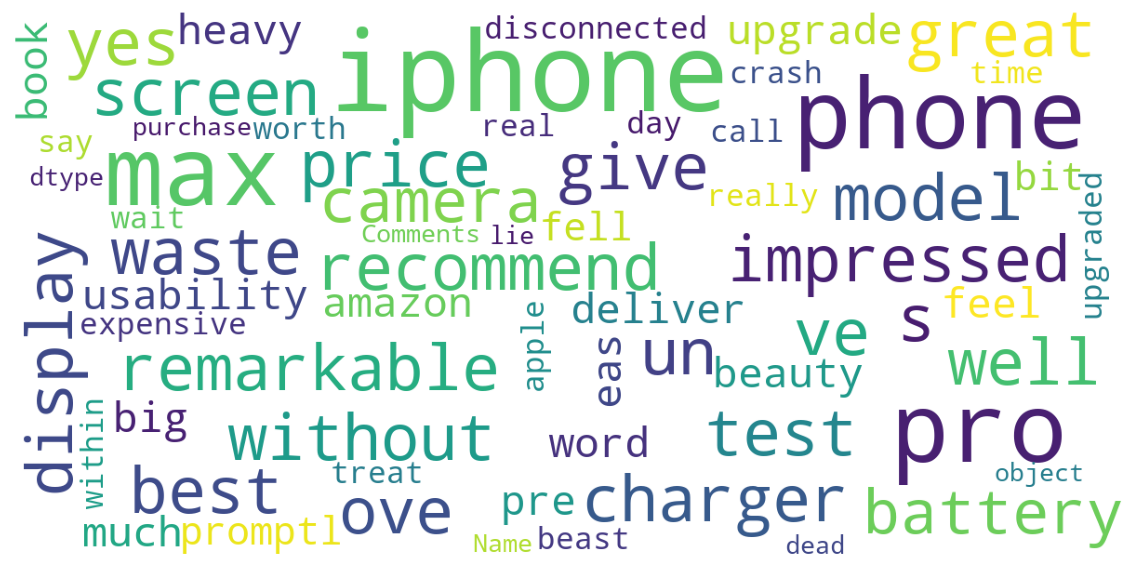

In [51]:
show_wordcloud(df["Comments"])

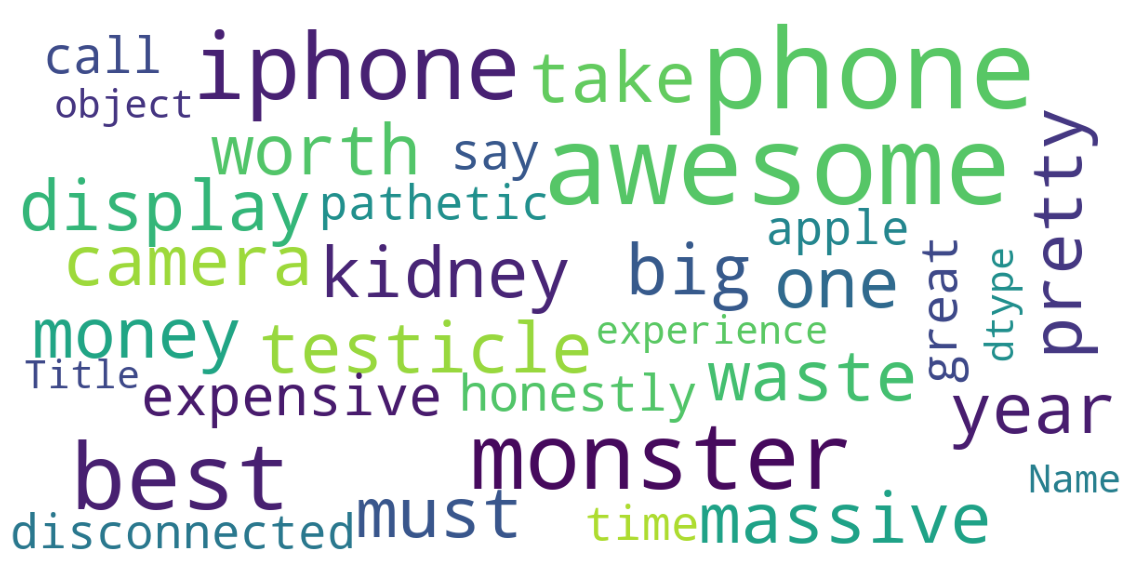

In [52]:
show_wordcloud(df["Title"])

In [53]:
# Highest positive sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("pos", ascending = False)[["Comments", "pos"]].head(10)
# Lowest negative sentiment reviews (with more than 5 words)
df[df["nb_words"] >= 5].sort_values("neg", ascending = False)[["Comments", "neg"]].head(10)

,Comments,neg
9,phone crash within day purchase lie dead ever ...,0.500
0,price without charger too.not recommend waste ...,0.353
2,best iphone yes max model give well screen ove...,0.125
1,impressed i’ve test iphones it’s remarkable un...,0.108
4,word beauty upgrade iphone feel big heavy much...,0.083
3,pro great display battery camera usability eas...,0.000
5,pre book iphone pro max amazon deliver promptl...,0.000
6,fell like phone bit expensive really apple say...,0.000
7,phone call get disconnected time,0.000
8,real beast treat wait worth upgraded pro max i...,0.000


In [54]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head(2)

,Title,Ratings,Comments,Date,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_iphone,Month,Year
0,waste money,1.0,price without charger too.not recommend waste ...,2020-11-09,0.353,0.647,0.000,-0.6007,76,11,0.018493,0.063010,-0.036939,-0.009388,0.000462,0.0,11,2020
1,take one kidney testicle worth,5.0,impressed i’ve test iphones it’s remarkable un...,2020-11-17,0.108,0.685,0.207,0.7351,334,49,-0.033100,-0.117259,-0.121314,-0.007763,-0.039771,1.0,11,2020


In [55]:
df_recent = df[(df['Year']== 2020) & (df['Month'] != 8)]
df_recent.head(2)

,Title,Ratings,Comments,Date,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,word_iphone,Month,Year
0,waste money,1.0,price without charger too.not recommend waste ...,2020-11-09,0.353,0.647,0.000,-0.6007,76,11,0.018493,0.063010,-0.036939,-0.009388,0.000462,0.0,11,2020
1,take one kidney testicle worth,5.0,impressed i’ve test iphones it’s remarkable un...,2020-11-17,0.108,0.685,0.207,0.7351,334,49,-0.033100,-0.117259,-0.121314,-0.007763,-0.039771,1.0,11,2020
